In [1]:
#Download VLA Holography with known panel deviations
import gdown
import shutil
from astrohack import panel

url = "https://drive.google.com/u/1/uc?id=10fXyut_UHPUjIuaaEy6-m6wcycZHit2v&export=download"
panelzip = "panel.zip"
gdown.download(url, panelzip)
shutil.unpack_archive(filename=panelzip, extract_dir=".")

Downloading...
From: https://drive.google.com/u/1/uc?id=10fXyut_UHPUjIuaaEy6-m6wcycZHit2v&export=download
To: /export/home/figs/vdesouza/work/Holography-1022/astrohack/examples/panel.zip
100%|█████████████████████████████████████████████████████████████████| 403k/403k [00:00<00:00, 2.88MB/s]


In [2]:
# Declare a path to the Amplitude and Deviation images produced by AIPS
npoints = 43
telescope = 'VLA'
# Create a new Antenna_Surface
vla = panel.Antenna_Surface('amp.fits','dev.fits',
                            npoints,telescope)

In [3]:
%%time
# Compile the list of points inside each panel, this is the longest step
vla.compile_panel_points()

CPU times: user 3.35 s, sys: 28.2 ms, total: 3.37 s
Wall time: 3.41 s


In [4]:
%%time 
# Fit surface to get the parameters for each panel
vla.fit_surface()

CPU times: user 365 ms, sys: 590 ms, total: 955 ms
Wall time: 288 ms


In [5]:
%%time
# Apply corrections to create a new antenna surface
vla.correct_surface()

CPU times: user 147 ms, sys: 2.49 ms, total: 150 ms
Wall time: 152 ms


In [6]:
# Compute the gains at a wavelenght as well as the antenna surface RMSes
wave = 1 # Unit may be cm or mm still not clear
ingains, ougains = vla.gains(wave)
inrms, ourms     = vla.get_rms()
print("Gains before correction: Real: {0:7.3} dB, Theoretical: {1:7.3} dB".format(*ingains))
print("RMS before correction: {0:7.3} mm".format(inrms))
print()
print("Gains after correction: Real: {0:7.3} dB, Theoretical: {1:7.3} dB".format(*ougains))
print("RMS after correction: {0:7.3} mm".format(ourms))

Gains before correction: Real:    50.1 dB, Theoretical:    66.3 dB
RMS before correction:   0.647 mm

Gains after correction: Real:    63.2 dB, Theoretical:    66.3 dB
RMS after correction:   0.263 mm


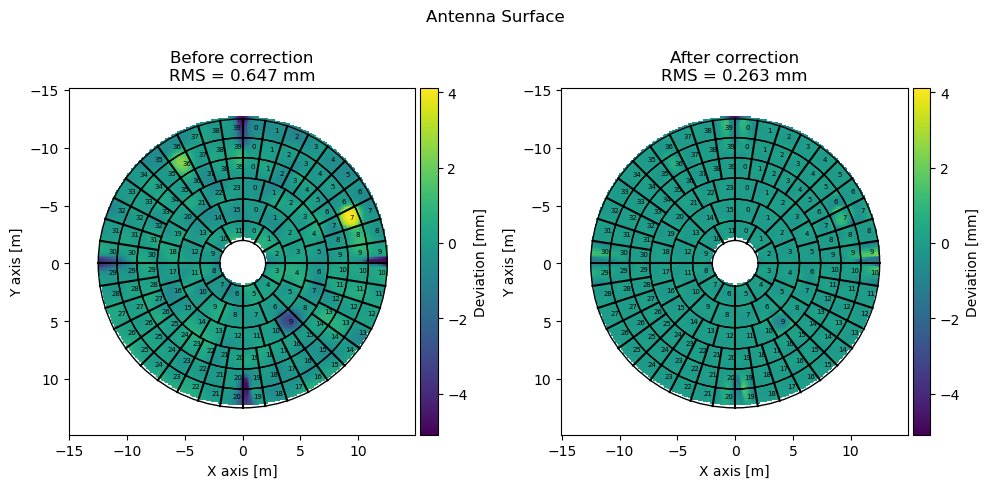

In [7]:
vla.plot_surface()

In [9]:
# Export products of the panel fitting
vla.export_screw_adjustments('screw-adjustments.txt')
vla.export_corrected('corrected-surface.fits')